In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rawDF = pd.read_csv('data/WorkingData.csv').set_index('ContestId')[['MaxNumberPlayers', 'Entries']]

In [6]:
rawDF.head()

,MaxNumberPlayers,Entries
ContestId,,
9267153,95,95
9267148,230,230
9219345,22,22
9213466,9400,9400
9213148,73,61


In [21]:
thresholds = []
successes = []
for i in range(0, 11):
    thresh = (100-i)/100.
    thresholds.append(thresh)
    successes.append(len(rawDF[rawDF['MaxNumberPlayers']*thresh<=rawDF['Entries']])/ len(rawDF))

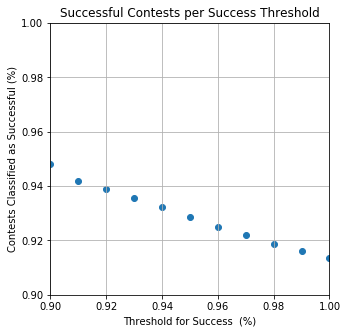

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(thresholds, successes)
ax.set_xlabel('Threshold for Success  (%)')
ax.set_ylabel('Contests Classified as Successful (%)')
ax.set_title('Successful Contests per Success Threshold')
ax.set_xlim(.9, 1)
ax.set_ylim(.9, 1)
ax.grid()

In [69]:
print(thresholds[0], successes[0]*len(rawDF))
print(thresholds[2], successes[2]*len(rawDF))

1.0 575966.0
0.98 579223.0


In [32]:
newSuccessDF = rawDF.assign(Success= lambda c: c.Entries >= c.MaxNumberPlayers*.98)[['Success']]

In [64]:
for filename in ['train.csv', 'test1.csv', 'test2.csv', 'test3.csv', 'test4.csv']:
    print('Modifying', filename)
    file = pd.read_csv('data/Vault/'+filename).set_index('ContestId')
    df = pd.merge(file.drop(columns=['Success']), newSuccessDF, on='ContestId', how='left')
    df.to_csv('Data/Vault98/'+filename)

Modifying test1.csv
Modifying test2.csv
Modifying test3.csv
Modifying test4.csv


In [71]:
newSuccessDF = rawDF.assign(Success= lambda c: c.Entries >= c.MaxNumberPlayers*.96)[['Success']]

In [73]:
for filename in ['train.csv', 'test1.csv', 'test2.csv', 'test3.csv', 'test4.csv']:
    print('Modifying', filename)
    file = pd.read_csv('data/Vault/'+filename).set_index('ContestId')
    df = pd.merge(file.drop(columns=['Success']), newSuccessDF, on='ContestId', how='left')
    df.to_csv('Data/Vault96/'+filename)

Modifying train.csv
Modifying test1.csv
Modifying test2.csv
Modifying test3.csv
Modifying test4.csv
